In [1]:
import os
print(os.getcwd())

/workspaces/DataAnalyticAssignments


In [2]:
import os
print(os.listdir())

['.git', '1stAssignment.ipynb', '2ndAssignment.ipynb', '3rdAssingment.ipynb', 'README.md', 'titanic.csv']


1. Data Cleaning and Preprocessing

Step 1:- Load the dataset and check missing values

In [3]:
import pandas as pd

df = pd.read_csv("titanic.csv")

print(df.head())
print(df.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa

Step 2:- Fill missing Age values with median

In [4]:
median_age = df["Age"].median()
df["Age"] = df["Age"].fillna(median_age)

Step 3:- Handle missing Embarked values

In [5]:
most_common_port = df["Embarked"].mode()[0]
df["Embarked"] = df["Embarked"].fillna(most_common_port)

Step 4:- Drop unnecessary columns

In [6]:
df_cleaned = df.drop(columns=["Name", "Ticket", "Cabin"])
print(df_cleaned.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    male  22.0      1      0   7.2500        S
1            2         1       1  female  38.0      1      0  71.2833        C
2            3         1       3  female  26.0      0      0   7.9250        S
3            4         1       1  female  35.0      1      0  53.1000        S
4            5         0       3    male  35.0      0      0   8.0500        S


2. Univariate Analysis

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Distribution of Age using histogram and KDE

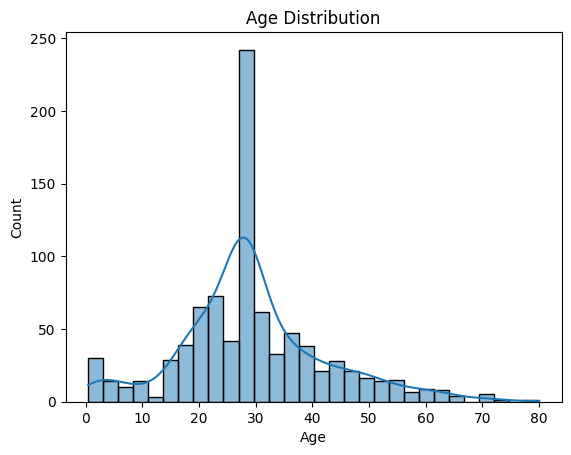

In [8]:
plt.figure()
sns.histplot(df_cleaned["Age"], kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Count of passengers by Sex

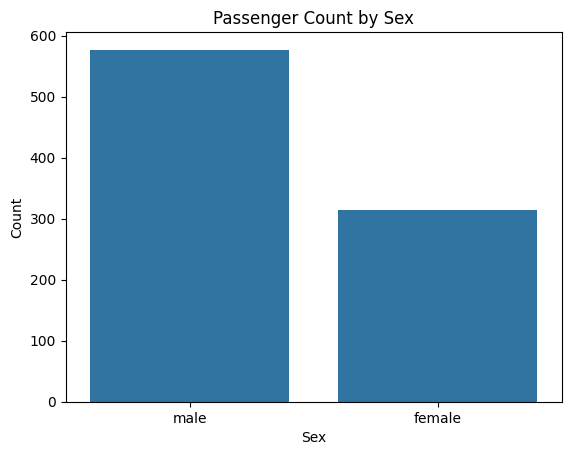

In [9]:
plt.figure()
sns.countplot(x="Sex", data=df_cleaned)
plt.title("Passenger Count by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

Distribution of Fare using boxplot

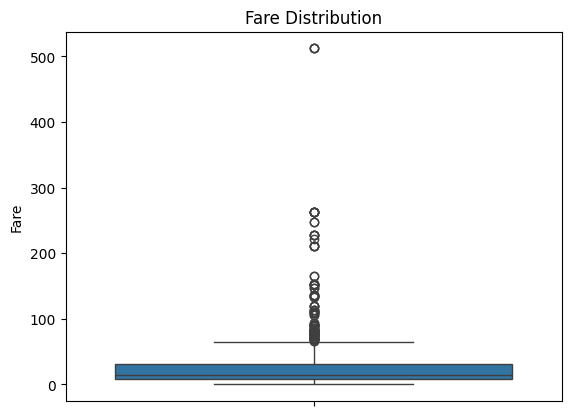

In [10]:
plt.figure()
sns.boxplot(y="Fare", data=df_cleaned)
plt.title("Fare Distribution")
plt.ylabel("Fare")
plt.show()

Survival rate across Sex

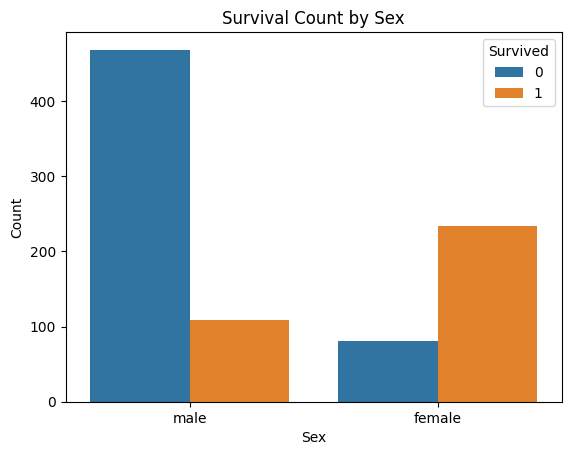

In [11]:
plt.figure()
sns.countplot(x="Sex", hue="Survived", data=df_cleaned)
plt.title("Survival Count by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

Pclass vs Fare using boxplot

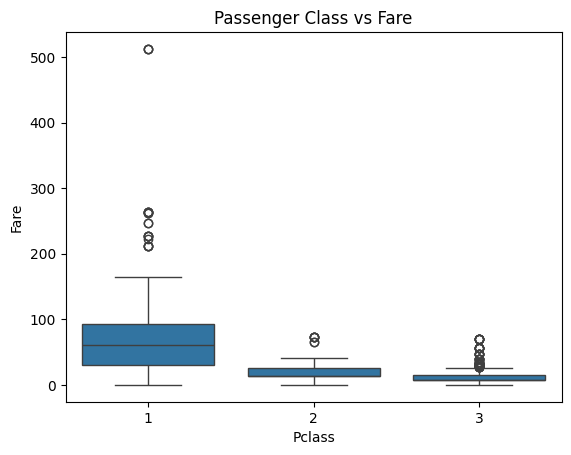

In [12]:
plt.figure()
sns.boxplot(x="Pclass", y="Fare", data=df_cleaned)
plt.title("Passenger Class vs Fare")
plt.xlabel("Pclass")
plt.ylabel("Fare")
plt.show()

Age vs Fare scatter plot colored by Survived

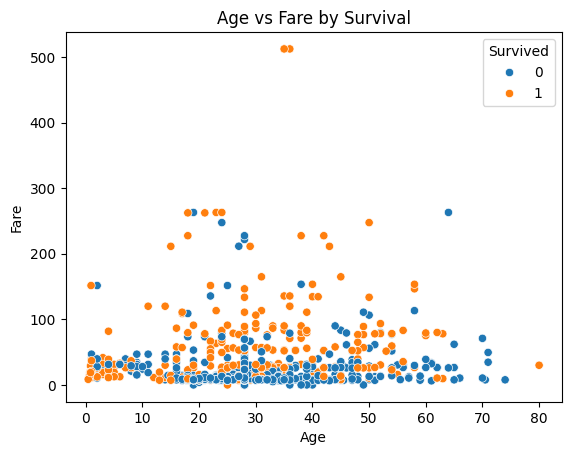

In [13]:
plt.figure()
sns.scatterplot(
    x="Age",
    y="Fare",
    hue="Survived",
    data=df_cleaned
)
plt.title("Age vs Fare by Survival")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()